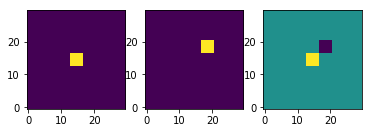

In [40]:
import numpy as np

constant = np.zeros((30,30), np.float32)
constant[13:17,13:17] = np.ones((4,4), np.float32)

measurement = np.zeros((30,30), np.float32)
measurement[17:21,17:21] = np.ones((4,4), np.float32)

from matplotlib import pyplot as plt
plt.clf()
#grid with one row, two columns and the index is 1 in this grid
plt.subplot(131)
plt.imshow(constant)
plt.gca().invert_yaxis()
#grid with one row, two columns and the index is 2 in this grid
plt.subplot(132)
plt.imshow(measurement)
plt.gca().invert_yaxis()
#grid with one row, two columns and the index is 3 in this grid
plt.subplot(133)
plt.imshow(constant - measurement)
plt.gca().invert_yaxis()
plt.show()

In [50]:
from scipy import signal

def computeJ(measurement):
    x_op = np.array([[ -1, 0, 1],
                       [ -1, 0, 1],
                       [ -1, 0, 1]])
    y_op = x_op.T
    grad_x = signal.convolve2d(measurement, x_op, boundary='symm', mode='same')
    grad_y = signal.convolve2d(measurement, y_op, boundary='symm', mode='same')
    return (grad_x, grad_y)

def computeDX(J, E):
    J_x, J_y = J[0], J[1]
    J_xx = J_x * J_x
    J_xy = J_x * J_y
    J_yx = J_xy
    J_yy = J_y * J_y
    M = np.array([[np.sum(J_xx),np.sum(J_xy)],
                  [np.sum(J_yx),np.sum(J_yy)]])
    J_x_E = J_x * E
    J_y_E = J_y * E
    b = np.array([[np.sum(J_x_E)],
                  [np.sum(J_y_E)]])
    dx= np.linalg.inv(M).dot(b)
    return dx
   
def shiftMeasurement(measurement,x):
    measurement_shifted = np.zeros(measurement.shape, np.float32)
    x_ = int(x[0])
    y_ = int(x[1])
    #print "x_", x_, "y_", y_
    for i in range(measurement.shape[0]):
        for j in range(measurement.shape[1]):    
            i_idx = max(0, min(measurement.shape[0]-1, i-y_))
            j_idx = max(0, min(measurement.shape[1]-1, j-x_))
            measurement_shifted[i,j] = measurement[i_idx,j_idx]
    return measurement_shifted
    
def optimise(constant, measurement, alpha = 1.0):
    #compute error
    #coursera Optical Flow: 2D Point Correspondences minute 17:20
    x0 = np.array([[0.0],[0.0]])
    for i in range(20):
        E = constant - measurement
        J = computeJ(measurement)
        dx = computeDX(J, E)
        #print "x0 ", x0.T, " dx ", dx.T, " E ", np.sum(np.abs(E))
        x0 +=dx * alpha
        measurement = shiftMeasurement(measurement,x0)
        if np.sum(np.abs(E)) <2:
            #print "broke at ", i
            break
    return x0
    

import time

start = time.time()
for i in range(1000):
    d = optimise(constant, measurement, alpha = 40.0)
end = time.time()
print(end - start)
print d

5.14599990845
[[-3.21428571]
 [-3.21428571]]


In [43]:
"""
in optimise if we do not break when error reaches a certain treshold it can go in cycles like this:
x0  [[0. 0.]]  dx  [[-0.00892857 -0.00892857]]  E  32.0
x0  [[-0.35714286 -0.35714286]]  dx  [[-0.00892857 -0.00892857]]  E  32.0
x0  [[-0.71428571 -0.71428571]]  dx  [[-0.00892857 -0.00892857]]  E  32.0
x0  [[-1.07142857 -1.07142857]]  dx  [[-0.05357143 -0.05357143]]  E  30.0
x0  [[-3.21428571 -3.21428571]]  dx  [[0. 0.]]  E  0.0
x0  [[-3.21428571 -3.21428571]]  dx  [[0.05357143 0.05357143]]  E  30.0
x0  [[-1.07142857 -1.07142857]]  dx  [[0.00892857 0.00892857]]  E  32.0
x0  [[-0.71428571 -0.71428571]]  dx  [[0.00892857 0.00892857]]  E  32.0
x0  [[-0.35714286 -0.35714286]]  dx  [[0.00892857 0.00892857]]  E  32.0
x0  [[1.11022302e-16 1.11022302e-16]]  dx  [[0.00892857 0.00892857]]  E  32.0
x0  [[0.35714286 0.35714286]]  dx  [[0.00892857 0.00892857]]  E  32.0
x0  [[0.71428571 0.71428571]]  dx  [[0.00892857 0.00892857]]  E  32.0
x0  [[1.07142857 1.07142857]]  dx  [[0.05357143 0.05357143]]  E  30.0
x0  [[3.21428571 3.21428571]]  dx  [[0. 0.]]  E  0.0
x0  [[3.21428571 3.21428571]]  dx  [[-0.05357143 -0.05357143]]  E  30.0
x0  [[1.07142857 1.07142857]]  dx  [[-0.00892857 -0.00892857]]  E  32.0
x0  [[0.71428571 0.71428571]]  dx  [[-0.00892857 -0.00892857]]  E  32.0
x0  [[0.35714286 0.35714286]]  dx  [[-0.00892857 -0.00892857]]  E  32.0
x0  [[3.33066907e-16 3.33066907e-16]]  dx  [[-0.00892857 -0.00892857]]  E  32.0
x0  [[-0.35714286 -0.35714286]]  dx  [[-0.00892857 -0.00892857]]  E  32.0
[[-0.71428571]
 [-0.71428571]]
"""

'\nin optimise if we do not break when error reaches a certain treshold it can go in cycles like this:\nx0  [[0. 0.]]  dx  [[-0.00892857 -0.00892857]]  E  32.0\nx0  [[-0.35714286 -0.35714286]]  dx  [[-0.00892857 -0.00892857]]  E  32.0\nx0  [[-0.71428571 -0.71428571]]  dx  [[-0.00892857 -0.00892857]]  E  32.0\nx0  [[-1.07142857 -1.07142857]]  dx  [[-0.05357143 -0.05357143]]  E  30.0\nx0  [[-3.21428571 -3.21428571]]  dx  [[0. 0.]]  E  0.0\nx0  [[-3.21428571 -3.21428571]]  dx  [[0.05357143 0.05357143]]  E  30.0\nx0  [[-1.07142857 -1.07142857]]  dx  [[0.00892857 0.00892857]]  E  32.0\nx0  [[-0.71428571 -0.71428571]]  dx  [[0.00892857 0.00892857]]  E  32.0\nx0  [[-0.35714286 -0.35714286]]  dx  [[0.00892857 0.00892857]]  E  32.0\nx0  [[1.11022302e-16 1.11022302e-16]]  dx  [[0.00892857 0.00892857]]  E  32.0\nx0  [[0.35714286 0.35714286]]  dx  [[0.00892857 0.00892857]]  E  32.0\nx0  [[0.71428571 0.71428571]]  dx  [[0.00892857 0.00892857]]  E  32.0\nx0  [[1.07142857 1.07142857]]  dx  [[0.053571